In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

(714, 714)

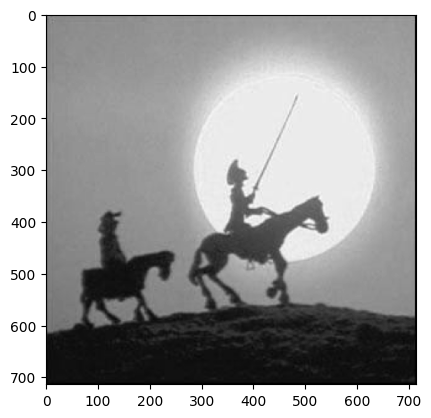

In [25]:
#19. Descargar la imagen quijote.jpg y utilizar el comando imread de la librer´ıa
#matplotlib.pyplot para cargarla. Imprimir el resultado

img = plt.imread('quijote.jpg')
img = img[:,:,1]
plt.imshow(img, cmap="gray")
img.shape

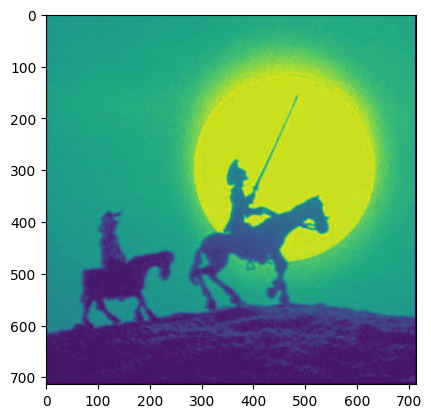

In [27]:
#change the color of the image
img2 = img.copy()
#img2[:,:,0] = 0 #assigns 0 to the red channel
#img2[:,:,1] = 0 #assigns 0 to the green channel
plt.imshow(img2)


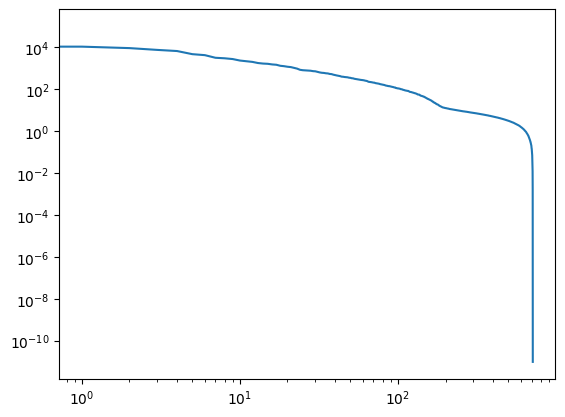

642
9.83641193186167e-12


In [73]:
img.shape
U, s, V = np.linalg.svd(img)


#plot the singular values
plt.loglog(s)
plt.show()
U.shape, V.shape, s.shape

for i in range(len(s)):
    if s[i] < 1:
        print(i)
        print(s[713])
        break

T = sum(s*s)/len(s)

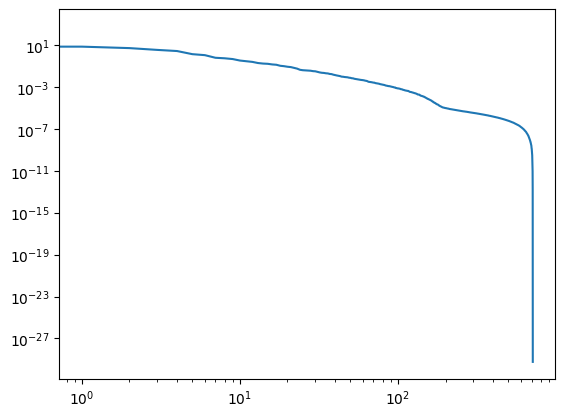

((714, 714), (714, 714), (714,))

In [75]:
#plot the singular values
plt.loglog((s*s)/T)
plt.show()
U.shape, V.shape, s.shape

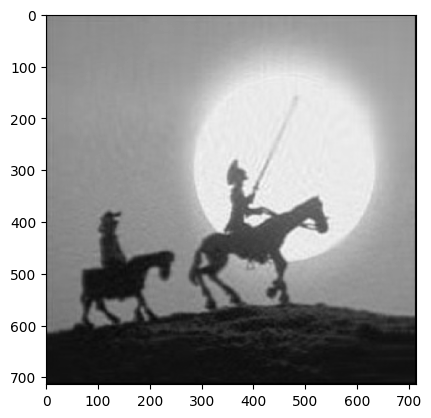

In [48]:
def calculate_svd(img, r):
    U, s, V = np.linalg.svd(img)
    U2 = U[:,:r]
    V2 = V[:r,:]
    return img.shape, U2, s[:r], V2

def calculate_img(shape, U, s, V):
    S = np.zeros(shape)
    S = np.diag(s)
    return U @ S @ V

def plot_svd(img, r):
    shape, U, s, V = calculate_svd(img, r)
    img2 = calculate_img(shape, U, s, V)
    plt.imshow(img2, cmap="gray")

plot_svd(img, 40)


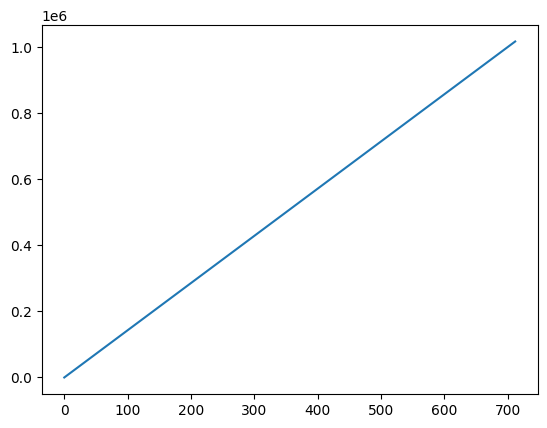

In [148]:
error = []
data = []

for r in range(0, 713):
    shape = img.shape
    e = s[r+1]/s[0]
    error.append(e)

    d = (shape[0]+shape[1])*r + r + 2
    data.append(d)

plt.plot(data)



> ℹ️ Acá observamos que el peso de la imagen es lineal

0.10198531170738485


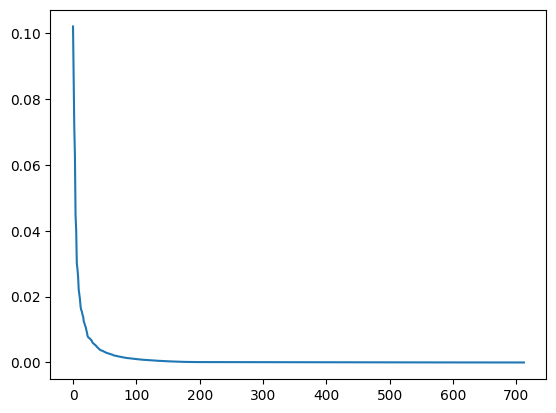

In [149]:
plt.plot(error)
print(error[0])

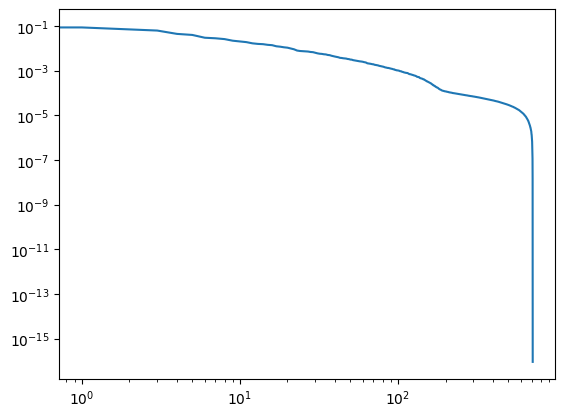

In [150]:
plt.loglog(error)

> ℹ️ Pero claramente la tasa de error relativo no lo es
>
> Tiende a 0 más rápido que el peso hacia el infinito

1.4994791166258126
(array([694]),)
[1.49947912]


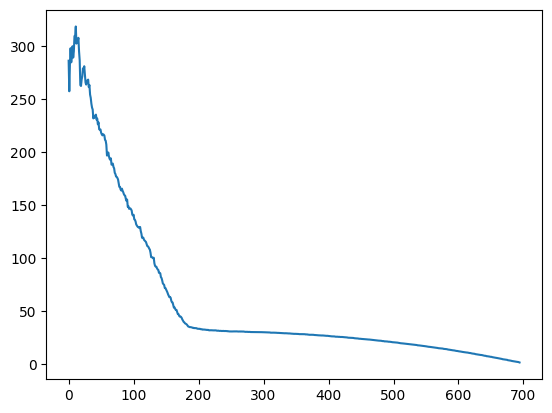

In [151]:
rate = np.array(error[5:700]) * np.array(data[5:700])
plt.plot(rate)

#find the maximum value of the error
min_rate = min(rate)
print(min_rate)
#find the index in min_rate
min_rate_index = np.where(rate == min_rate)
print(min_rate_index)
print(rate[min_rate_index])


9.015211587338597e-23
(array([712]),)
[9.01521159e-23]


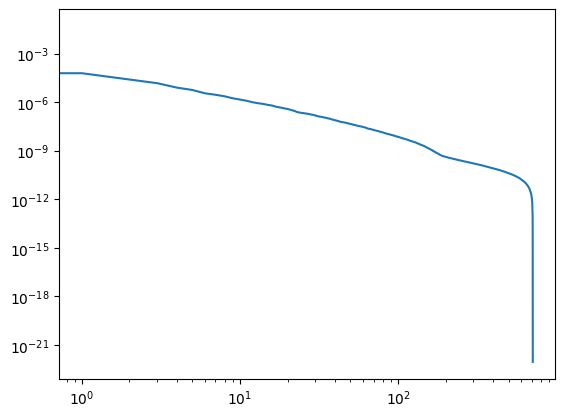

In [152]:
rate =  (np.array(error) / np.array(data))
plt.loglog(rate)

#find the maximum value of the error
min_rate = min(rate)
print(min_rate)
#find the index in min_rate
min_rate_index = np.where(rate == min_rate)
print(min_rate_index)
print(rate[min_rate_index])


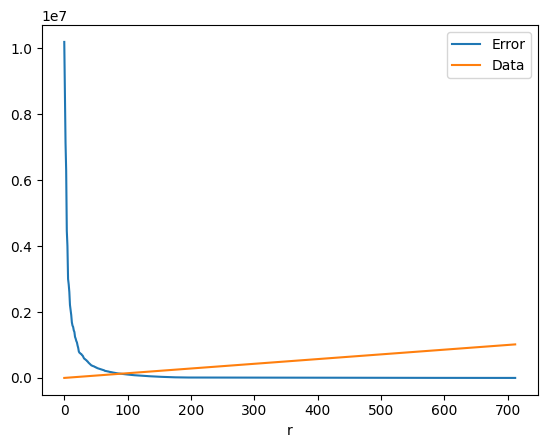

In [153]:
plt.plot(np.array(error)*100000000)
plt.plot(data)
#add labels 
plt.xlabel('r')
#labels for each function
plt.legend(['Error','Data'])
plt.show()

Bueno como consecuencia no sé si entendí correctamente cual es la mejor manera de hacerlo. 
Los primeros valores son los más eficientes, pero en realidad como el error tiende a 0 más rápido que el peso, guardar toda la data siempre va a ser mejor. 

Una idea podría ser multiplicar el peso de los datos al cuadrado, o hacerlo exponencial, para dejar más clara la diferencia.

1497789.2036613752
(array([694]),)
[1497789.20366138]


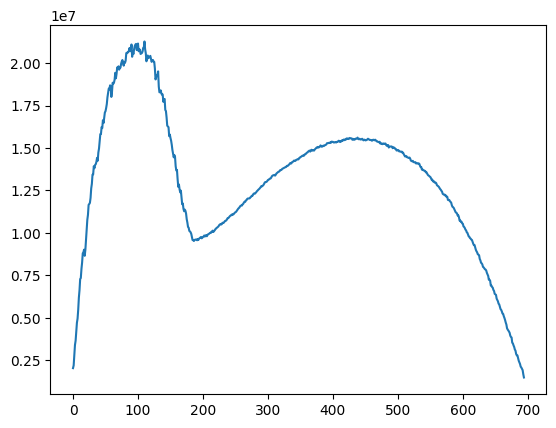

In [154]:
rate = np.array(error[5:700]) * np.array(data[5:700])**2
plt.plot(rate)

#find the maximum value of the error
min_rate = min(rate)
print(min_rate)
#find the index in min_rate
min_rate_index = np.where(rate == min_rate)
print(min_rate_index)
print(rate[min_rate_index])


Acá le sigue ganando al final el error, pero tenemos una imagen mucho más distinta

14627967578.354519
(array([0]),)
[1.46279676e+10]


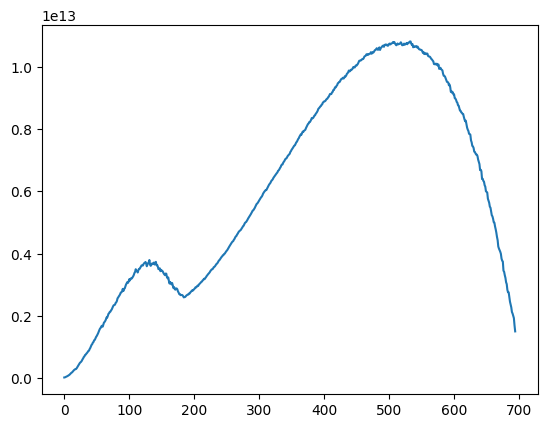

In [155]:
rate = np.array(error[5:700]) * np.array(data[5:700])**3
plt.plot(rate)

#find the maximum value of the error
min_rate = min(rate)
print(min_rate)
#find the index in min_rate
min_rate_index = np.where(rate == min_rate)
print(min_rate_index)
print(rate[min_rate_index])


Acá si ya no le gana velocidad de disminución de error a la de aumento de datos almacenados.

Cantidad de autovectores de representación al 95 %:  75


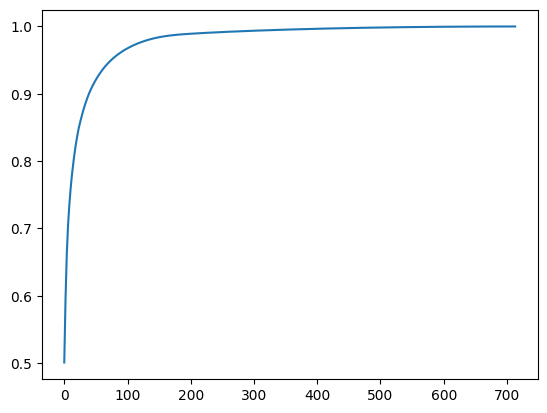

In [156]:
ratio = np.cumsum(np.array(s)) / np.sum(np.array(s))
plt.plot(ratio)
#plt.plot(np.cumsum(s[100:])/ np.sum(s))
x = np.where(ratio > 0.95)[0]
M = x[0]

print('Cantidad de autovectores de representación al 95 %: ', M)

### Creo que utilizar esta métrica es más útil, podemos ver cómo evoluciona de la mano del peso de la imagen

1017450.0000000019
(array([712, 713]),)
[1017450. 1017450.]


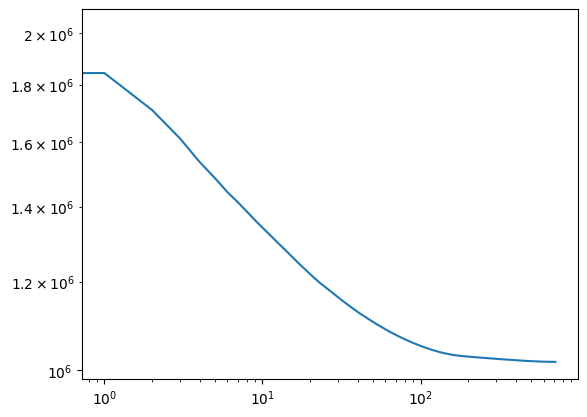

In [168]:
rate = np.array(data[-1:]) / np.array(ratio)
plt.loglog(rate)

#find the maximum value of the error
min_rate = min(rate)
print(min_rate)
#find the index in min_rate
min_rate_index = np.where(rate == min_rate)
print(min_rate_index)
print(rate[min_rate_index])


Chau, probemos con 'imagenes' especiales.

255.0 255.0


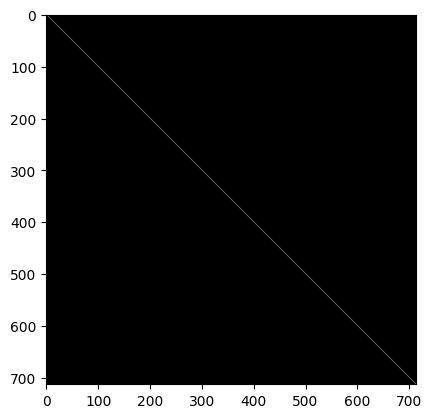

In [174]:
eye = np.eye(713)*255

#show image
plt.imshow(eye, cmap="gray")

def plot_svd(img, r):
    shape, U, s, V = calculate_svd(img, r)
    img2 = calculate_img(shape, U, s, V)
    plt.imshow(img2, cmap="gray")

#plot the singular values
shape, U, s, V = calculate_svd(eye, 713)
print(min(s), max(s))


Cantidad de autovectores de representación al 95 %:  677
:) 95% de 714 677.35


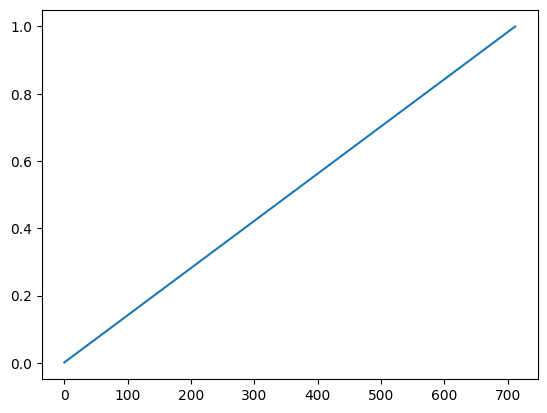

In [177]:
ratio = np.cumsum(np.array(s)) / np.sum(np.array(s))
plt.plot(ratio)
#plt.plot(np.cumsum(s[100:])/ np.sum(s))
x = np.where(ratio > 0.95)[0]
M = x[0]

print('Cantidad de autovectores de representación al 95 %: ', M)
print(':) 95% de 714', 0.95*713)

1017450.0
(array([712]),)
[1017450.]


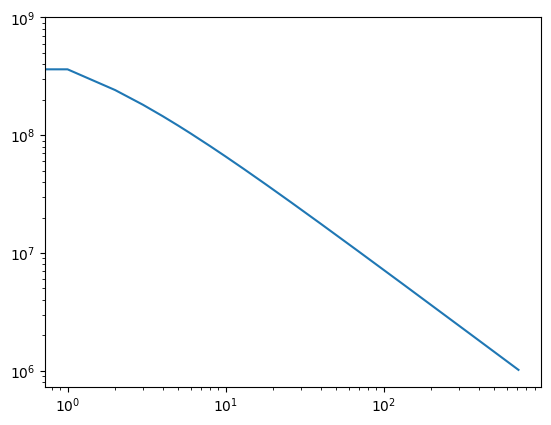

In [180]:
rate = np.array(data[-1:]) / np.array(ratio)
plt.loglog(rate)

#find the maximum value of the error
min_rate = min(rate)
print(min_rate)
#find the index in min_rate
min_rate_index = np.where(rate == min_rate)
print(min_rate_index)
print(rate[min_rate_index])
